# Objective: Identify the best source of recruitment for a tech startup, based on previous data of candidate sources and recruitment strategies



In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [108]:
df_hr = pd.read_csv("C:/Users/hp/Desktop/desktop data/EDA/HR_project/Recruitment_Data.csv")

In [109]:
df_hr.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [110]:
df_hr.shape

(446, 4)

In [111]:
print('data has {} rows and {} columns'.format(df_hr.shape[0], df_hr.shape[1]))

data has 446 rows and 4 columns


# Data Understanding

In [112]:
df_hr.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [113]:
df_hr.nunique()

attrition               2
performance_rating      5
sales_quota_pct       446
recruiting_source       4
dtype: int64

In [114]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [115]:
df_hr.duplicated().sum()

0

In [116]:
df_hr.isna().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

Column recruitment_source contains 205 null values.

### Handling NULL values in Categorical column

In [117]:
df_hr['recruiting_source']=df_hr['recruiting_source'].fillna(df_hr['recruiting_source'].mode()[0])

In [118]:
df_hr['recruiting_source'].mode()

0    Applied Online
Name: recruiting_source, dtype: object

In [119]:
df_hr.isna().sum()

attrition             0
performance_rating    0
sales_quota_pct       0
recruiting_source     0
dtype: int64

In [120]:
df_hr['recruiting_source']

0      Applied Online
1      Applied Online
2              Campus
3      Applied Online
4      Applied Online
            ...      
441            Campus
442          Referral
443    Applied Online
444    Applied Online
445    Applied Online
Name: recruiting_source, Length: 446, dtype: object

# Exploratory Data Analysis

### Univariate Data Analysis

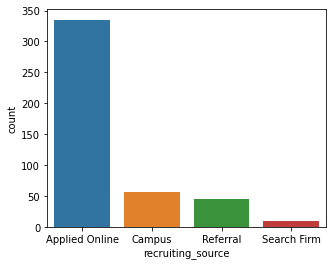

In [121]:
plt.figure(figsize=(5,4))
sns.countplot(df_hr['recruiting_source'],data=df_hr)
plt.show()

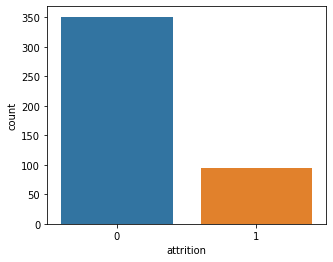

In [122]:
plt.figure(figsize=(5,4))
sns.countplot(df_hr['attrition'],data=df_hr)
plt.show()

Data is highly imbalanced 

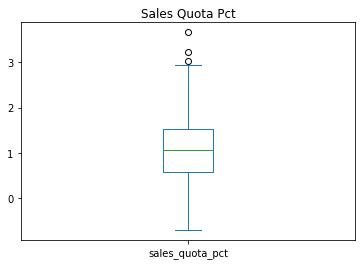

In [123]:
#plt.figure(figsize=(5,4))
df_hr['sales_quota_pct'].plot(kind='box', title='Sales Quota Pct') 
plt.show()

Check for outliers

In [124]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[6,5])
    plt.subplots_adjust(wspace=0.4,hspace=0.3)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])    

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=10,color="blue")
        plt.ylabel(None)
        plt.title(j,fontsize=10,color='brown')


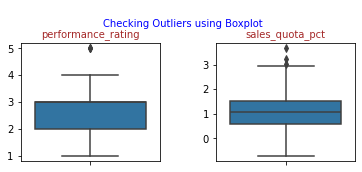

In [125]:
num_cols = ["performance_rating",	"sales_quota_pct"]

Check_Outliers(df_hr,num_cols)

"Performance rating" and "Sales_quota_pct":Both these variables contain outliers as can be seen in the boxplot So, These outliers needs to be treated for these variables.

In [126]:
# Defining user define function to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [179]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["performance_rating","sales_quota_pct"]

# UDF 
Outlier_treatment(df_hr,capping_cols)

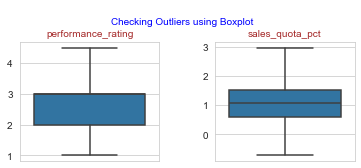

In [180]:
num_cols = ["performance_rating",	"sales_quota_pct"]

Check_Outliers(df_hr,num_cols)

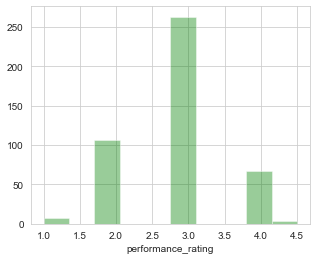

In [164]:
plt.figure(figsize=(5,4))
sns.set_style('whitegrid')
sns.distplot(df_hr['performance_rating'], kde = False, color ='green', bins = 10)
plt.show()

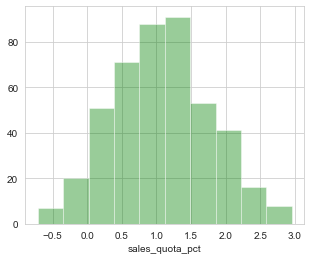

In [168]:
plt.figure(figsize=(5,4))
sns.set_style('whitegrid')
sns.distplot(df_hr['sales_quota_pct'], kde = False, color ='green', bins = 10)
plt.show()

# Bivariate Analysis 

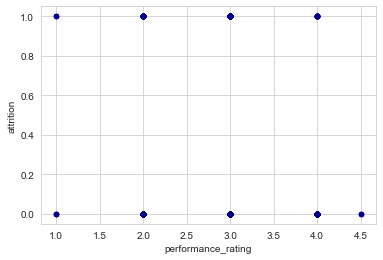

In [173]:
ax1 = df_hr.plot.scatter(x='performance_rating', y='attrition',c='DarkBlue')

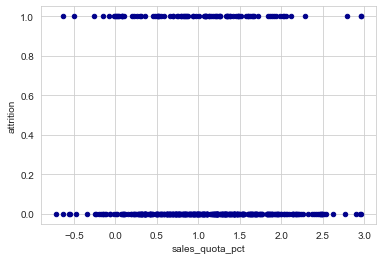

In [174]:
ax1 = df_hr.plot.scatter(x='sales_quota_pct', y='attrition',c='DarkBlue')

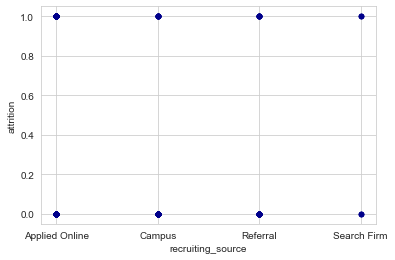

In [175]:
ax1 = df_hr.plot.scatter(x='recruiting_source', y='attrition',c='DarkBlue')

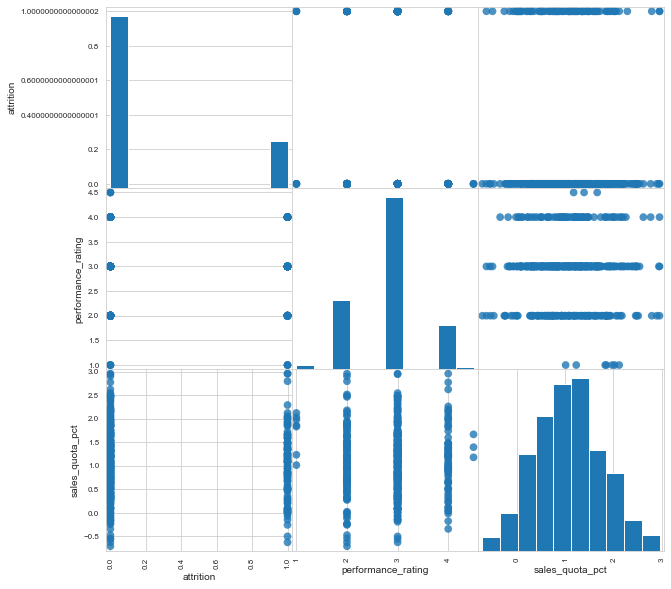

In [171]:
pair_plt = pd.plotting.scatter_matrix(df_hr, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.8)

plt.show()

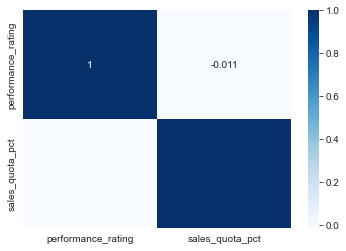

In [177]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_hr[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

In [193]:
cor_matrix = df_hr[num_cols1].corr()

In [194]:
cor_matrix

,performance_rating,sales_quota_pct
performance_rating,1.000000,-0.011356
sales_quota_pct,-0.011356,1.000000


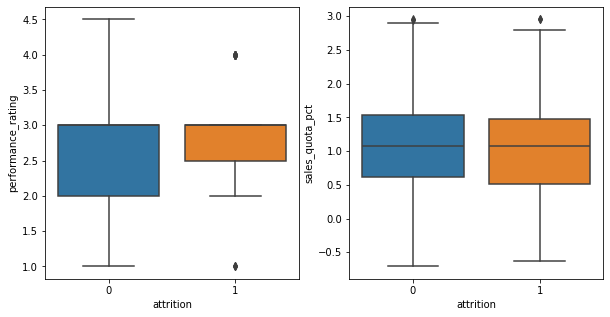

In [131]:
# Boxplot with attrition as hue
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot(y = 'performance_rating', x = 'attrition', data = df_hr)
plt.subplot(1,2,2)
sns.boxplot(y = 'sales_quota_pct', x = 'attrition', data = df_hr)
plt.show()

# Identify groups in the dataset

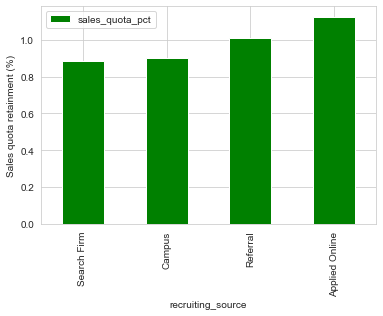

In [196]:
# Which recruiting source resulted highest sales_quota_pct?
Sales_Quota_Pct = df_hr.groupby('recruiting_source')[['sales_quota_pct']].mean().sort_values('sales_quota_pct')
Sales_Quota_Pct.plot(kind='bar', color='Green')
plt.ylabel('Sales quota retainment (%)')
plt.show()

Recruitment source applied online performed higher average sales_quota_pct than others.


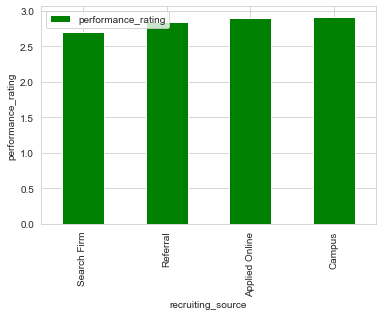

In [195]:
# Which recruiting source resulted in highest perfromance rating?
Perf_rate= df_hr.groupby('recruiting_source')[['performance_rating']].mean().sort_values('performance_rating')
Perf_rate.plot(kind='bar', color='green')
plt.ylabel('performance_rating')
plt.show()

This shows that the perfromance rating of the employees who were hired via "Campus" channel which is higher than others. However the differences are small.

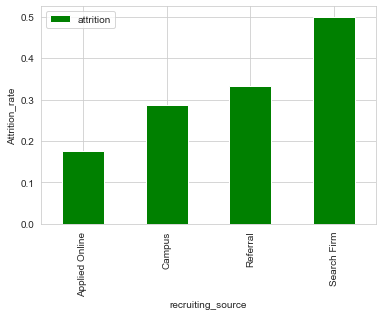

In [197]:
# Which hires had lower attrition rate?¶
# Another quality of hire metric you can consider is the attrition rate, or how often hires leave the company.

Att_rate= df_hr.groupby('recruiting_source')[['attrition']].mean().sort_values('attrition')
Att_rate.plot(kind='bar', color='Green')
plt.ylabel('Attrition_rate')
plt.show()

This shows how attrition rate is highest for hires coming through Search Firms, while lowest for hires coming from "Applied Online".

## Get Average Sales Numbers and Attrition Numbers

### 1. Print out the average Sales Number grouped by Recruiting Source

In [135]:
Avg_Sales_number = df_hr.groupby('recruiting_source')[['sales_quota_pct']].mean()

In [136]:
Avg_Sales_number

,sales_quota_pct
recruiting_source,
Applied Online,1.125609
Campus,0.901683
Referral,1.007372
Search Firm,0.886960


### 2. Print out the average Attrition Number grouped by Recruiting Source

In [137]:
Avg_Att_Number= df_hr.groupby('recruiting_source')[['attrition']].mean()

In [138]:
Avg_Att_Number

,attrition
recruiting_source,
Applied Online,0.176119
Campus,0.285714
Referral,0.333333
Search Firm,0.500000


### 3. Sources that have high Sales numbers and low Attrition numbers.

In [139]:
High_Sales_number = df_hr.groupby('recruiting_source')[['sales_quota_pct']].mean().sort_values('sales_quota_pct', ascending=False)

In [140]:
High_Sales_number


,sales_quota_pct
recruiting_source,
Applied Online,1.125609
Referral,1.007372
Campus,0.901683
Search Firm,0.886960


Recruitment source which have High Sales number is "Applied Online".

In [141]:
Low_Att_Number= df_hr.groupby('recruiting_source')[['attrition']].mean().sort_values('attrition', ascending=True)

In [142]:
Low_Att_Number

,attrition
recruiting_source,
Applied Online,0.176119
Campus,0.285714
Referral,0.333333
Search Firm,0.500000


Recruitment source which have low attrition number is "Applied Online".

# Conclusions

Finally, we'll summarize the insights gained from the EDA and provide recommendations for further analysis.

The dataset has 446 rows and 4 columns.

There are 205 missing values in the 'recruiting_source' column that may need to be addressed.

Missing values in 'recruiting source' column is addressed by replacing mode value which is 'Applied online'.

After dealing with missing values, the 'recruting source' column is represnted by count plot, where maximum recruting souce is'Applied online'. 

The majority of recruitmnet source is 'Applied online'. 

The attrition data is highly imbalanced. Employees attrition rate is low that means maximum employess stay in the organization after recruitment.

"Performance rating" and "Sales_quota_pct":Both these variables contain outliers as can be seen in the boxplot, indicating that there may be some extreme values in the data.So, These outliers needs to be treated for these variables.

There is a negative weak correlation between 'sales_quota_pct' and 'performance_rating', these columns are not strong predictors of attrition. 


Recruitment source which have High Sales number is "Applied Online".

Attrition rate is highest for hires coming through Search Firms, while lowest for hires coming from "Applied Online".

Recruitment source which have low attrition number is "Applied Online".

The perfromance rating of the employees who were hired via "Campus" channel which is higher than others.

# The best source of recruitment for a tech startup is Applied Online.